In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) Effect of curvature on laminar thickness before and after smoothing

In [2]:
curv_map = surfaces.CurvatureMap(downsampled=True)

/home/asaberi/laminar_organization/code/figures/../datasets.py:387: RuntimeWarning: invalid value encountered in divide
  laminar_thickness[hem] /= laminar_thickness[hem].sum(axis=1, keepdims=True)


Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1.npz
0


<AxesSubplot: >

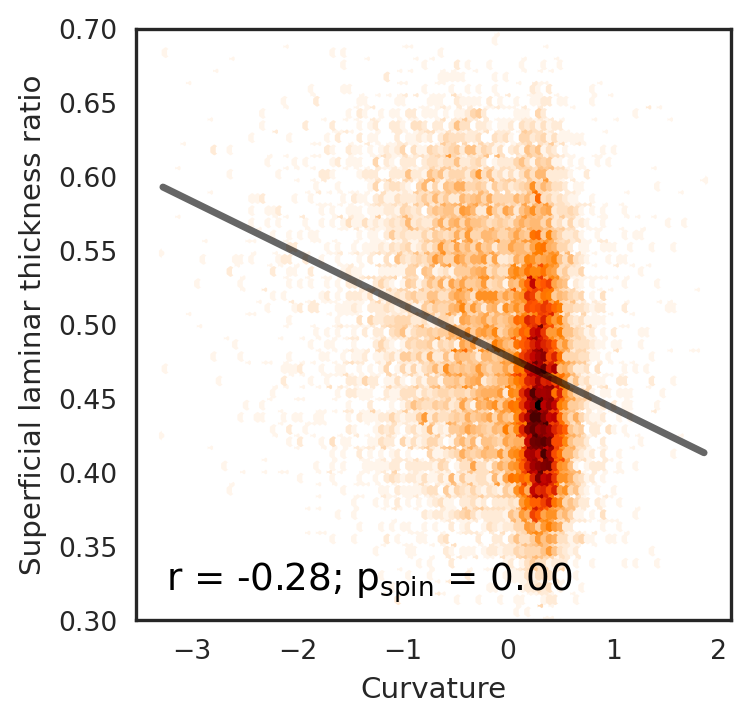

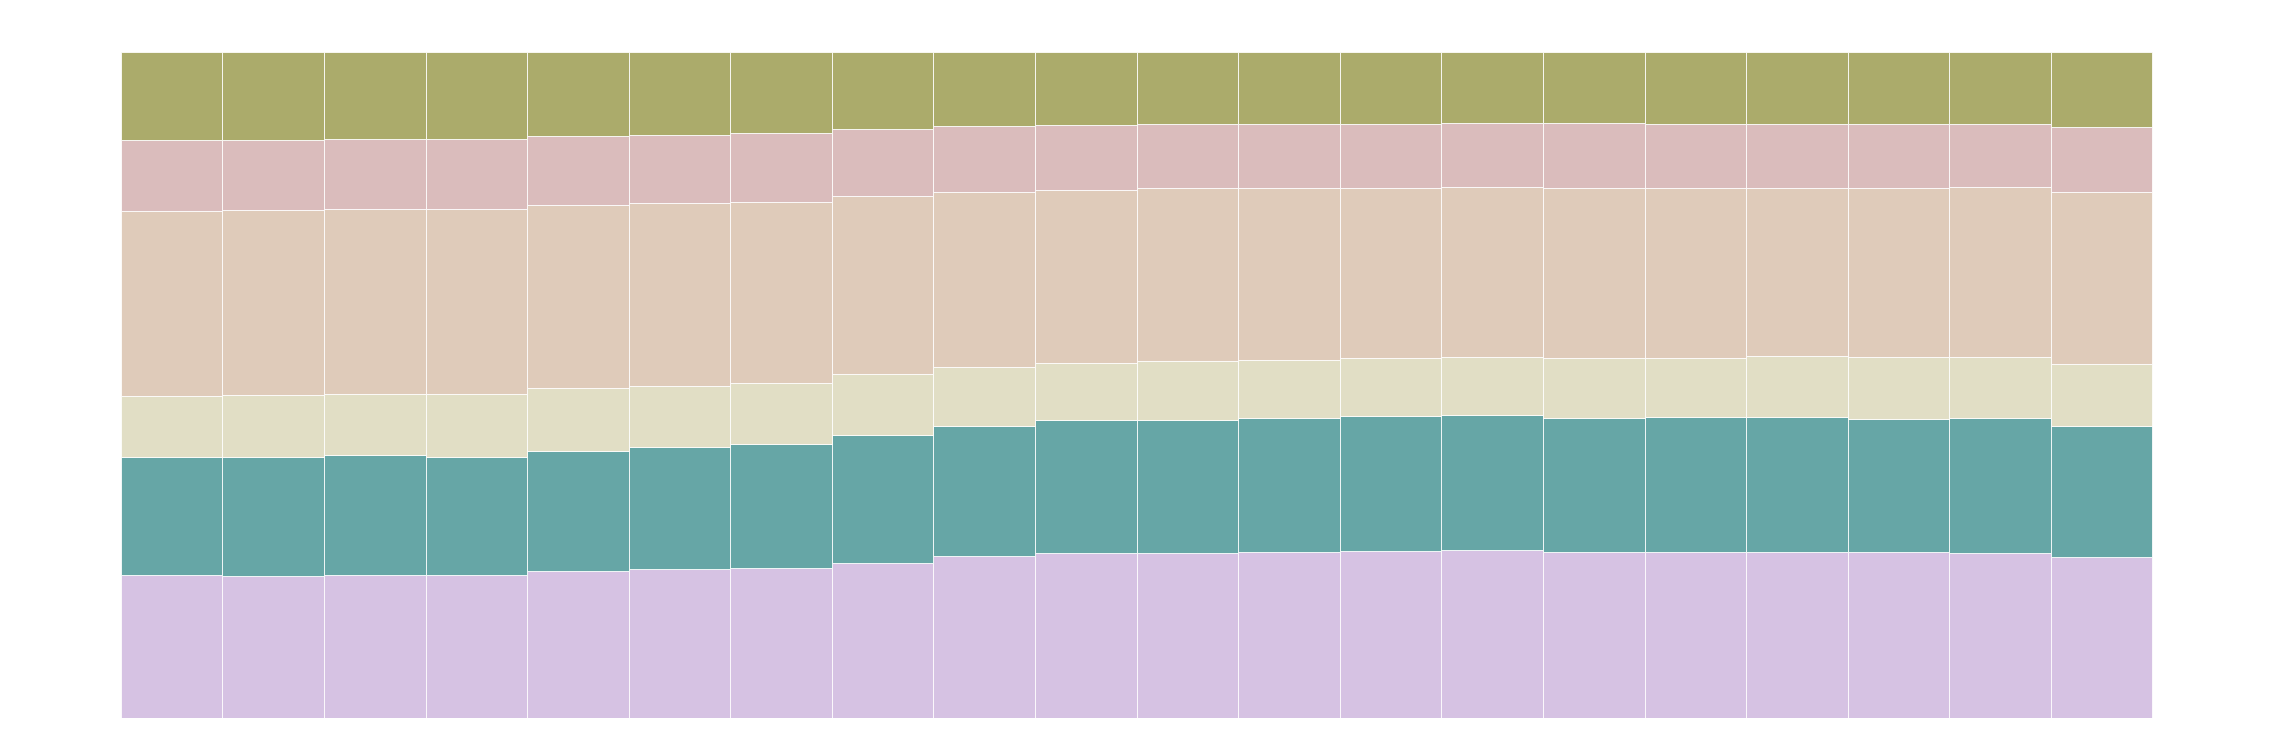

In [3]:
curv_map.effect_on_laminar_thickness(correct_curvature=None)

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1.npz
0


<AxesSubplot: >

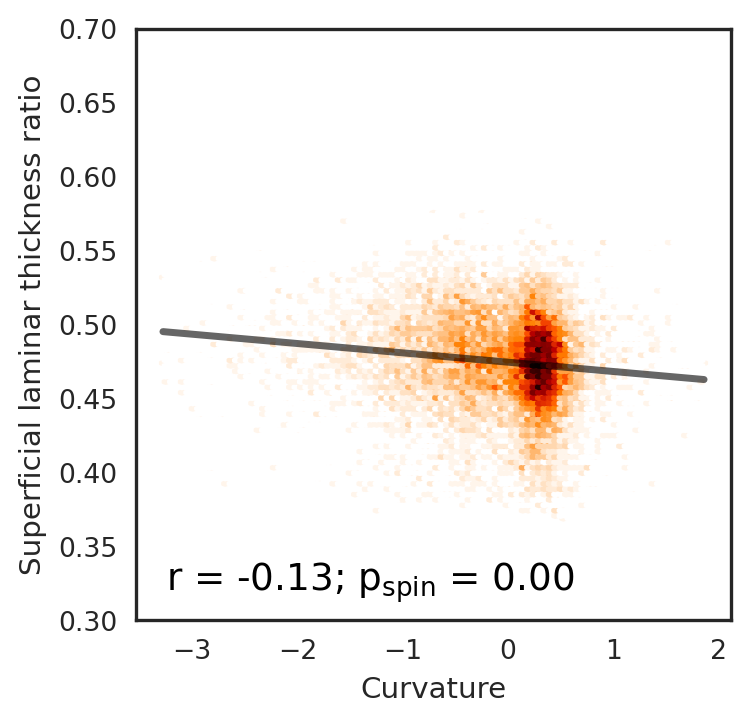

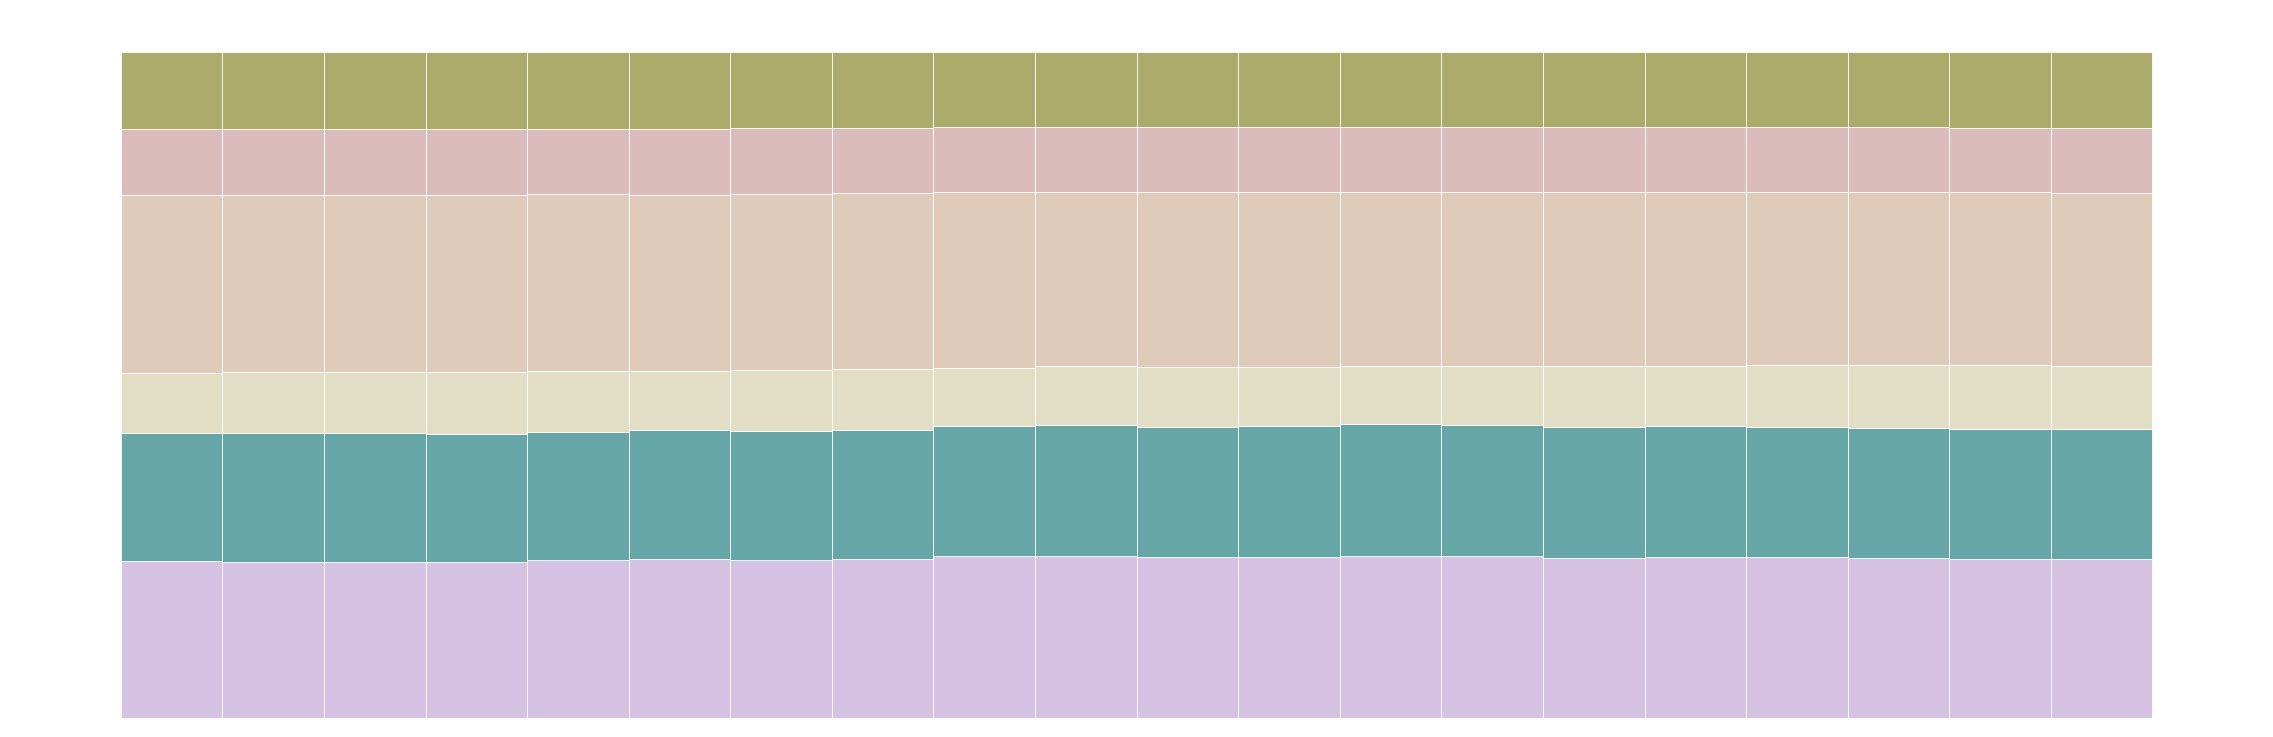

In [4]:
curv_map.effect_on_laminar_thickness(correct_curvature='smooth-10')

## b) Association of curvature similarity and laminar thickness covariance before and after smoothing

Warning: This will take a lot of time and resources!

In [2]:
curv_sim = matrices.CurvatureSimilarityMatrix('schaefer1000', exc_regions='adysgranular')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/curvature/curvature_similarity_matrix_parc-schaefer1000.npz


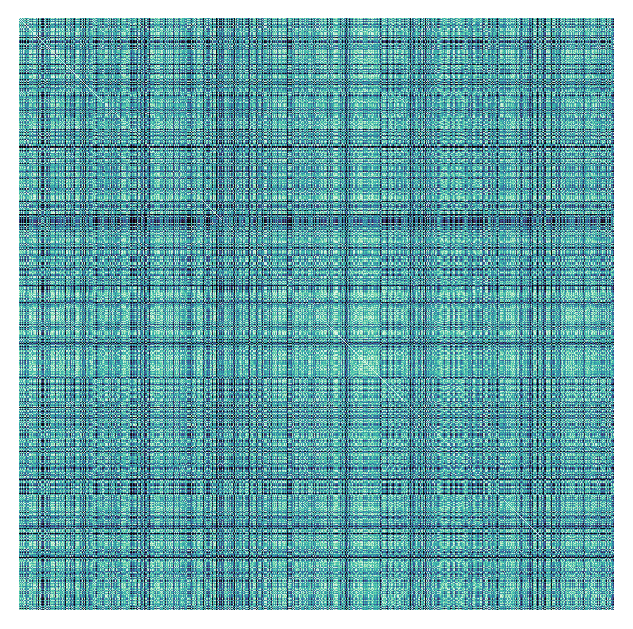

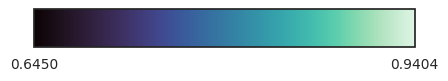

In [3]:
curv_sim.plot()

In [6]:
ltc_smooth = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000', correct_curvature='smooth-10')
ltc_none = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000', correct_curvature=None)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Creating microstructural covariance matrix


/home/asaberi/laminar_organization/code/figures/../datasets.py:387: RuntimeWarning: invalid value encountered in divide
  laminar_thickness[hem] /= laminar_thickness[hem].sum(axis=1, keepdims=True)


permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Pearson correlation with Curvature similarity
Coef: 0.20276544396049276; p-value (spin): 0.0


(0.20276544396049276, 0.0)

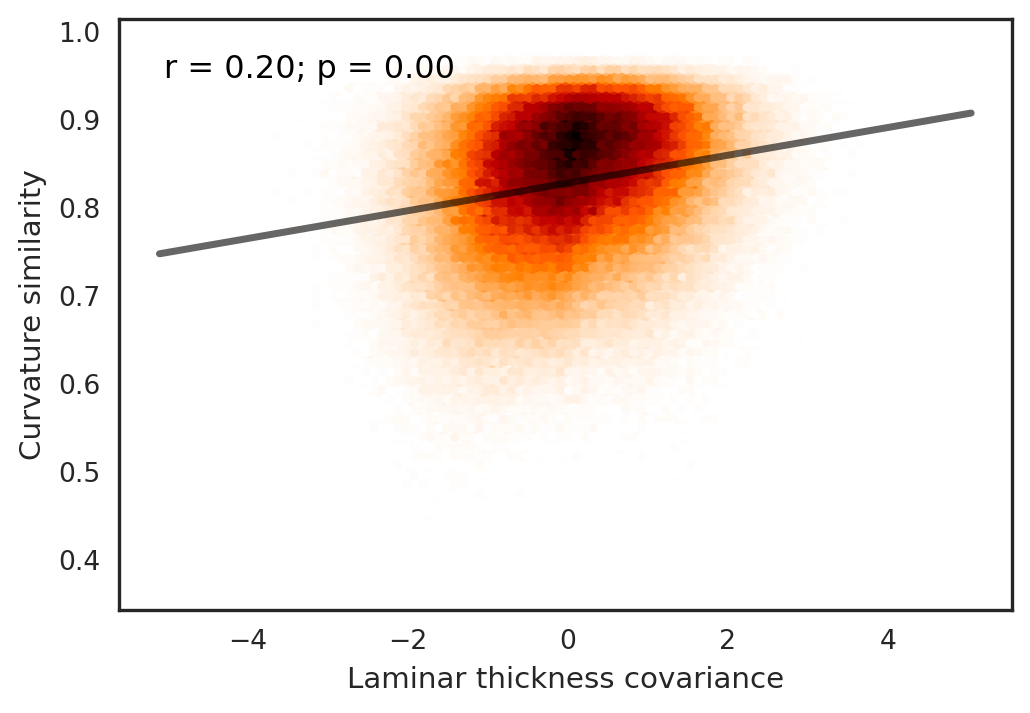

In [7]:
ltc_none.correlate_edge_wise(curv_sim)

Pearson correlation with Curvature similarity
Coef: 0.045659131802582034; p-value (spin): 0.0


(0.045659131802582034, 0.0)

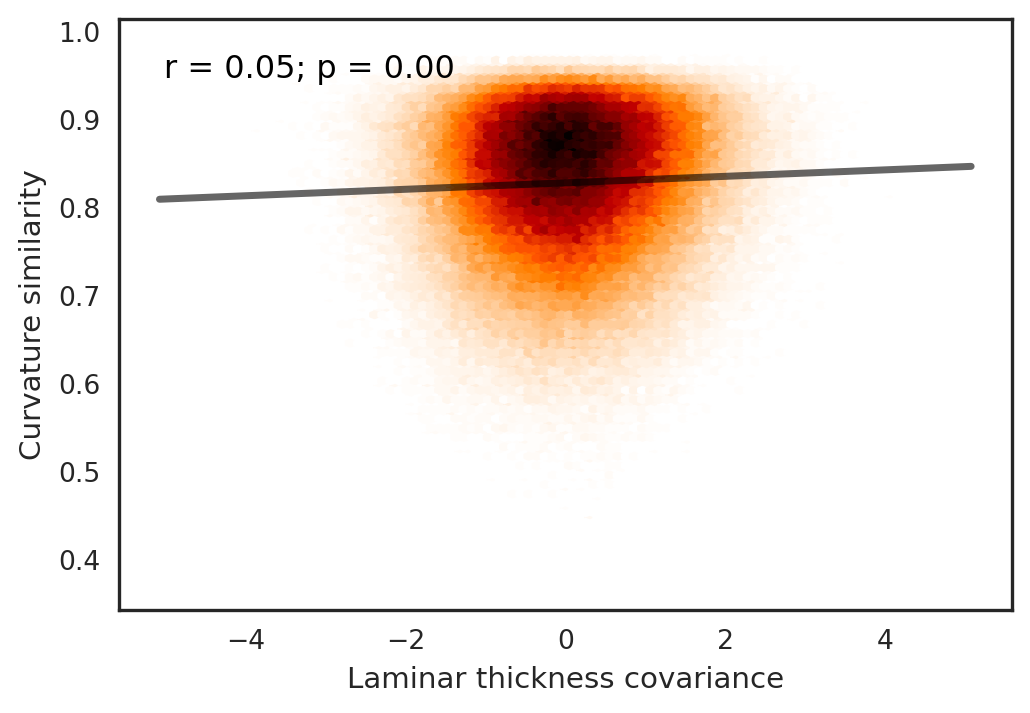

In [8]:
ltc_smooth.correlate_edge_wise(curv_sim)

## c) Association of LTC G1 with curvature map before and after smoothing

Curvature map:

In [9]:
curv_map_ico7 = surfaces.CurvatureMap(downsampled=False, exc_regions='allocortex').surf_data.squeeze()

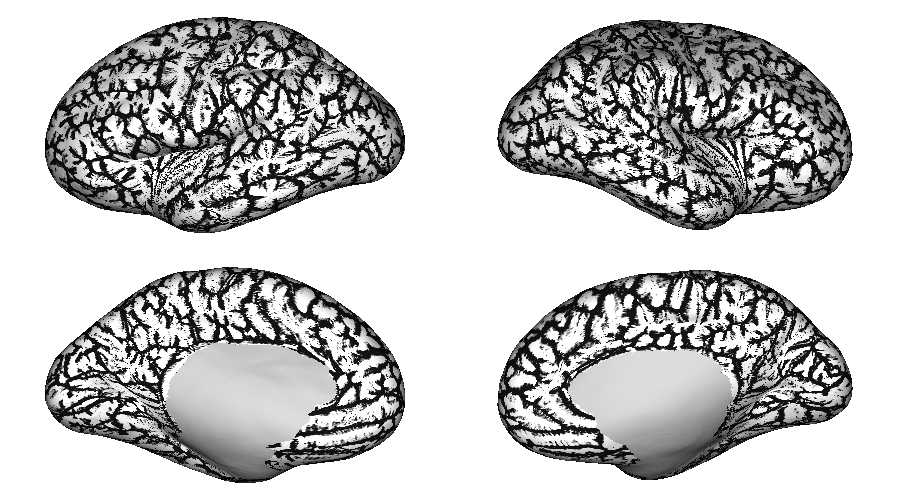

In [16]:
helpers.plot_surface(curv_map_ico7, plot_downsampled=False, vrange=(-0.25, 0.25), cmap='Greys', layout_style='grid')

In [5]:
ltcg_smooth = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000'))
ltcg_none = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000', correct_curvature=None))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-none_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1.npz
0


(             LTC G1
 Curvature -0.159938,
            LTC G1
 Curvature     0.0)

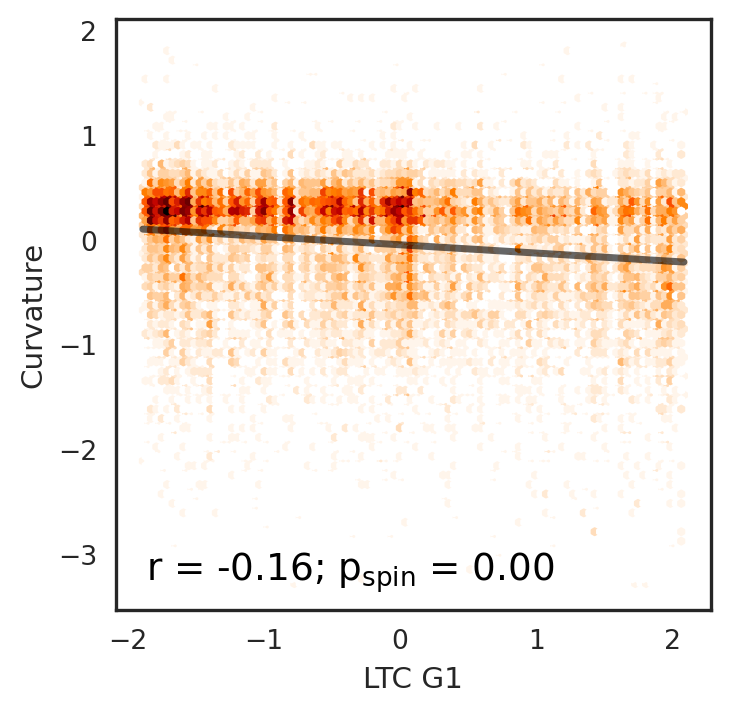

In [6]:
ltcg_none.correlate(curv_map, parcellated=False, x_columns=['LTC G1'])

Calculating correlations with spin test
Spin permutations already exist
		Batch /home/asaberi/laminar_organization/code/../src/tpl-bigbrain_desc-spin_indices_downsampled_n-1.npz
0


(             LTC G1
 Curvature -0.066477,
            LTC G1
 Curvature     0.0)

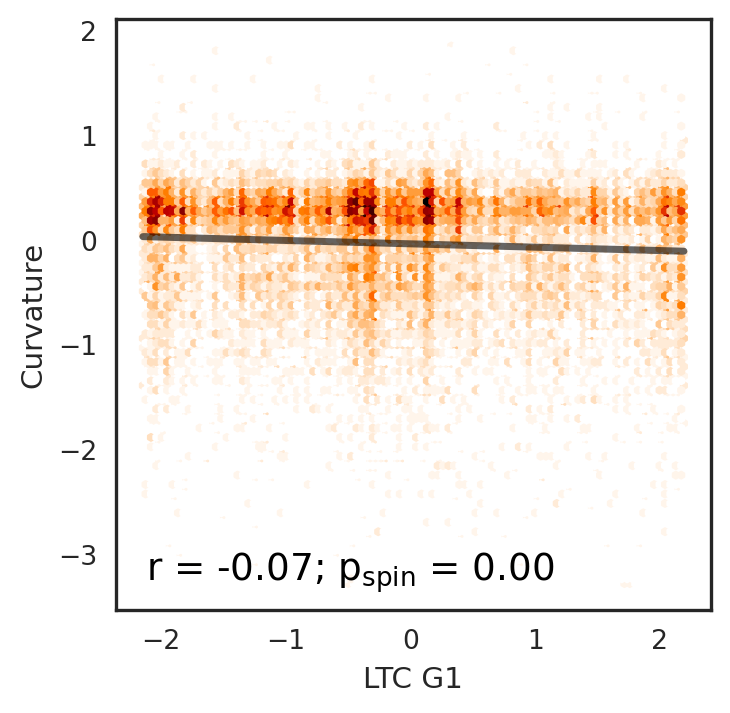

In [8]:
ltcg_smooth.correlate(curv_map, parcellated=False, x_columns=['LTC G1'])